In [3]:
"""
Here, we retrieve the necessary libraries for this project
1. urllib.request.urlretrieve to convert a url into a temporary file
2. Pandas for data manipulation and analysis
3. Scipy.stats for statistical computations
4. matplotlib.pyplot.plt to assist in creating graphs and such
"""
from urllib.request import urlretrieve
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

#Convert the url into a temporary file on the disk
URL = 'https://raw.githubusercontent.com/knpraveen/VideoGameSales/master/vgsales.csv'
urlretrieve(URL, 'vgsales.csv') 

('vgsales.csv', <http.client.HTTPMessage at 0x236bceb20a0>)

In [4]:
# !head vgsales.csv #prints out the csv file

In [5]:
#Reads a comma-separated values (CSV) file into a DataFrame object
#and then prints out the first ten rows
DATA = pd.read_csv('vgsales.csv')
DATA.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


## Display the Number of Video Games Sold from Year (1980 - 2017)

<BarContainer object of 39 artists>

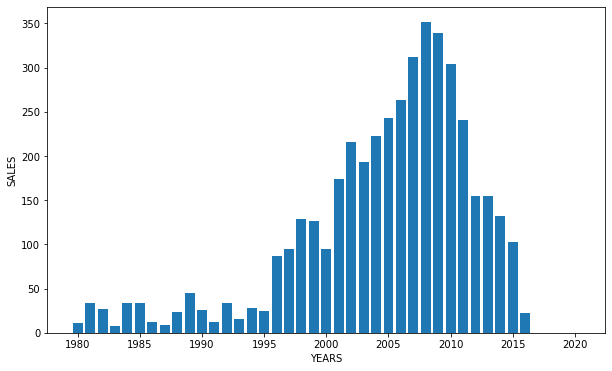

In [20]:
#Create another DataFrame derived from the "Year" and 
# "NA_Sales" columns of DATA 
YEAR_SALES = DATA[["Year", "NA_Sales"]]
YEAR_SALES.head()

#Create another DataFrame object, with "NA_Sales" summed up by year
total_sales_per_year = YEAR_SALES.groupby(['Year'], sort = False).sum()

"""
Create the plot shown below, in which the x-axis holds the index values
(years) and the y-axis holds the number of total sales
per year
"""
fig, tys = plt.subplots(figsize=(10,6))
x_axis = total_sales_per_year.index.values
y_axis = total_sales_per_year.NA_Sales
plt.xlabel('YEARS')
plt.ylabel('SALES')
tys.bar(x_axis, y_axis)



# Section 1: Data Cleaning 


In [9]:
"""
In the following section we conducted a removal of unnessary data columns
and empty values
"""
#Creates another DataFrame object by reading the vgsales.csv file
df= pd.read_csv('vgsales.csv')
df.head()
#Below is our current DataFrame without any Data Cleaning

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [10]:
"""
Create a list called dropCol that'll be used along with the 
pandas.DataFrame drop method to remove the unnecessary columns
and data
"""
dropCol = ['Rank', 'Year', 'EU_Sales', 'JP_Sales',
          'Other_Sales', 'Global_Sales']

df.drop(columns=dropCol, inplace=True, axis=1)
df.head(10)
print(df.head())

                       Name Platform         Genre Publisher  NA_Sales
0                Wii Sports      Wii        Sports  Nintendo     41.49
1         Super Mario Bros.      NES      Platform  Nintendo     29.08
2            Mario Kart Wii      Wii        Racing  Nintendo     15.85
3         Wii Sports Resort      Wii        Sports  Nintendo     15.75
4  Pokemon Red/Pokemon Blue       GB  Role-Playing  Nintendo     11.27


In [11]:
# DataFrame has be updated to remove any video game 
# that has made zero sales in NA

df = df.loc[df['NA_Sales'] != 0]     
df
#The df below shows our current data without unnecessary values

,Name,Platform,Genre,Publisher,NA_Sales
0,Wii Sports,Wii,Sports,Nintendo,41.49
1,Super Mario Bros.,NES,Platform,Nintendo,29.08
2,Mario Kart Wii,Wii,Racing,Nintendo,15.85
3,Wii Sports Resort,Wii,Sports,Nintendo,15.75
4,Pokemon Red/Pokemon Blue,GB,Role-Playing,Nintendo,11.27
...,...,...,...,...,...
16591,Myst IV: Revelation,PC,Adventure,Ubisoft,0.01
16592,Plushees,DS,Simulation,Destineer,0.01
16593,Woody Woodpecker in Crazy Castle 5,GBA,Platform,Kemco,0.01
16594,Men in Black II: Alien Escape,GC,Shooter,Infogrames,0.01


<BarContainer object of 25 artists>

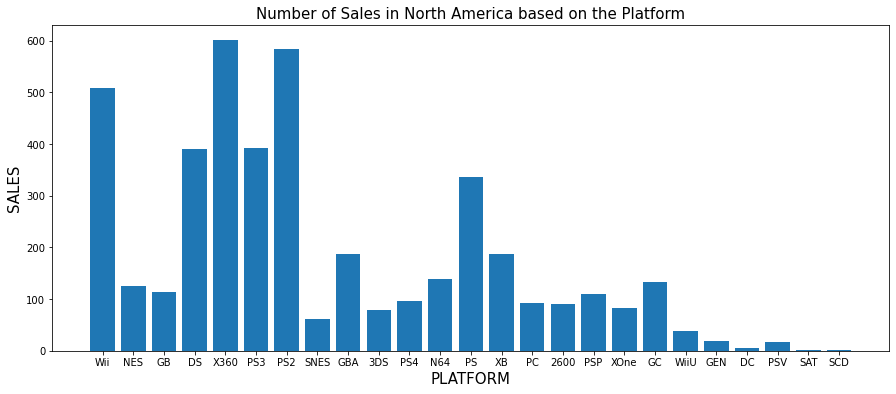

In [12]:
#Create a DataFrame object that contains the "Platform" and "NA_Sales"
#columns and their values from df
PLATFORM_SALES = df[["Platform", "NA_Sales"]]
PLATFORM_SALES.head()

#Create a DataFrame object in which the sales are totaled up based on
# platform
total_sales_per_platform= PLATFORM_SALES.groupby(['Platform'], sort = False).sum()

#Create the plot shown below in which the x-axis 
#holds the type of platforms, and
#the y-axis holds the total number of sales for each given platoform
fig, tys = plt.subplots(figsize=(15,6))
x_axis = total_sales_per_platform.index.values
y_axis = total_sales_per_platform.NA_Sales
plt.title('Number of Sales in North America based on the Platform', size=15)
plt.xlabel('PLATFORM', size=15)
plt.ylabel('SALES', size=15)
tys.bar(x_axis, y_axis)

# Data Cleaning 
- Remove outliers and un marked data from the data set 

In [13]:
# clean_Data = pd.read_csv('vgsales.csv')
# #dropping columns 
# .drop(['Rank', 'Year', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'], axis=1)

In [14]:
# # total_sales_per_year = YEAR_SALES.groupby(['Year'], sort = False).sum()
# platForm_NAsales = cleaned.groupby('Platform', sort = False).sum()
# print(platForm_NAsales)

# #
# fig, tys = plt.subplots(figsize=(17,6))
# # x_axis = total_sales_per_year.index.values
# x_axis = platForm_NAsales.index.values

# y_axis = platForm_NAsales.NA_Sales

# # # y_axis = total_sales_per_year.NA_Sales
# # plt.xlabel('YEARS')
# # plt.ylabel('SALES')
# plt.xlabel('PLATFORM')
# plt.ylabel('NA_SALES')
# # plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right'
# tys.bar(x_axis, y_axis)

In [15]:
# clean_Data['z_score'] = stats.zscore(clean_Data['NA_Sales'])
# clean_Data

In [16]:
# clean_Data.loc[clean_Data['z_score'].abs()<=40]

# Linear Regression

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [18]:
df.head()

,Name,Platform,Genre,Publisher,NA_Sales
0,Wii Sports,Wii,Sports,Nintendo,41.49
1,Super Mario Bros.,NES,Platform,Nintendo,29.08
2,Mario Kart Wii,Wii,Racing,Nintendo,15.85
3,Wii Sports Resort,Wii,Sports,Nintendo,15.75
4,Pokemon Red/Pokemon Blue,GB,Role-Playing,Nintendo,11.27


### Features:
- **Name:** The individual game's title
- **Platform:** The platform in which the game was initially released on (Wii, Xbox, Playstation, etc.)
- **Genre:** The category-type of the game
- **Publisher:** The company that published the game
- **NA_Sales:** Total sales in North America (millions)

### Creating the feature matrix and target vector

In [19]:
#Features chosen for the dataset
features = ['Name', 'Platform', 'Genre', 'Publisher', 'NA_Sales']

#Feature matrix
X = df[features]

print(X.shape)
X.head()

(12099, 5)


,Name,Platform,Genre,Publisher,NA_Sales
0,Wii Sports,Wii,Sports,Nintendo,41.49
1,Super Mario Bros.,NES,Platform,Nintendo,29.08
2,Mario Kart Wii,Wii,Racing,Nintendo,15.85
3,Wii Sports Resort,Wii,Sports,Nintendo,15.75
4,Pokemon Red/Pokemon Blue,GB,Role-Playing,Nintendo,11.27


In [20]:
#Target vector
y = df['NA_Sales']

y.size
y.head()

0    41.49
1    29.08
2    15.85
3    15.75
4    11.27
Name: NA_Sales, dtype: float64

In [21]:
# Splitting the dataset into testing and training:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, 
                                                    random_state=2)

print(X_train.shape)
print(y_train.shape)

(9074, 5)
(9074,)


In [22]:
print(X_test.shape)
print(y_test.shape)

(3025, 5)
(3025,)


In [23]:
import numpy as np
from sklearn.preprocessing import OneHotEncoder

### Obtaining the top publishers to encode them in a binary manner

In [24]:
#Obtaining the top 10 publishers
topPublishers = [x for x in df.Publisher.value_counts().sort_values(ascending=False).head(10).index]

topPublishers

['Electronic Arts',
 'Activision',
 'Ubisoft',
 'THQ',
 'Sony Computer Entertainment',
 'Nintendo',
 'Konami Digital Entertainment',
 'Take-Two Interactive',
 'Sega',
 'Atari']

In [25]:
#Creating the binary variables
for label in topPublishers:
    df[label] = np.where(df['Publisher'] == label, 1, 0)

df[['Publisher']+topPublishers].head(5)

,Publisher,Electronic Arts,Activision,Ubisoft,THQ,Sony Computer Entertainment,Nintendo,Konami Digital Entertainment,Take-Two Interactive,Sega,Atari
0,Nintendo,0,0,0,0,0,1,0,0,0,0
1,Nintendo,0,0,0,0,0,1,0,0,0,0
2,Nintendo,0,0,0,0,0,1,0,0,0,0
3,Nintendo,0,0,0,0,0,1,0,0,0,0
4,Nintendo,0,0,0,0,0,1,0,0,0,0


In [26]:
df.head()

,Name,Platform,Genre,Publisher,NA_Sales,Electronic Arts,Activision,Ubisoft,THQ,Sony Computer Entertainment,Nintendo,Konami Digital Entertainment,Take-Two Interactive,Sega,Atari
0,Wii Sports,Wii,Sports,Nintendo,41.49,0,0,0,0,0,1,0,0,0,0
1,Super Mario Bros.,NES,Platform,Nintendo,29.08,0,0,0,0,0,1,0,0,0,0
2,Mario Kart Wii,Wii,Racing,Nintendo,15.85,0,0,0,0,0,1,0,0,0,0
3,Wii Sports Resort,Wii,Sports,Nintendo,15.75,0,0,0,0,0,1,0,0,0,0
4,Pokemon Red/Pokemon Blue,GB,Role-Playing,Nintendo,11.27,0,0,0,0,0,1,0,0,0,0


### Obtaining the top platforms to encode them in a binary manner

In [27]:
#Obtaining the top 10 publishers
topPlatform = [x for x in df.Platform.value_counts().sort_values(ascending=False).head(10).index]

topPlatform

['PS2', 'DS', 'Wii', 'X360', 'PS3', 'PS', 'XB', 'GBA', 'PSP', 'GC']

In [28]:
#Creating the binary variables
for label in topPlatform:
    df[label] = np.where(df['Platform'] == label, 1, 0)

df[['Platform']+topPlatform].head(10)

,Platform,PS2,DS,Wii,X360,PS3,PS,XB,GBA,PSP,GC
0,Wii,0,0,1,0,0,0,0,0,0,0
1,NES,0,0,0,0,0,0,0,0,0,0
2,Wii,0,0,1,0,0,0,0,0,0,0
3,Wii,0,0,1,0,0,0,0,0,0,0
4,GB,0,0,0,0,0,0,0,0,0,0
5,GB,0,0,0,0,0,0,0,0,0,0
6,DS,0,1,0,0,0,0,0,0,0,0
7,Wii,0,0,1,0,0,0,0,0,0,0
8,Wii,0,0,1,0,0,0,0,0,0,0
9,NES,0,0,0,0,0,0,0,0,0,0


In [29]:
df.head()

,Name,Platform,Genre,Publisher,NA_Sales,Electronic Arts,Activision,Ubisoft,THQ,Sony Computer Entertainment,...,PS2,DS,Wii,X360,PS3,PS,XB,GBA,PSP,GC
0,Wii Sports,Wii,Sports,Nintendo,41.49,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,Super Mario Bros.,NES,Platform,Nintendo,29.08,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Mario Kart Wii,Wii,Racing,Nintendo,15.85,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,Wii Sports Resort,Wii,Sports,Nintendo,15.75,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Pokemon Red/Pokemon Blue,GB,Role-Playing,Nintendo,11.27,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Obtaining the top genres to encode them in a binary manner

In [30]:
topGenres = [x for x in df.Genre.value_counts().sort_values(ascending=False).head(10).index]

topGenres

['Action',
 'Sports',
 'Misc',
 'Shooter',
 'Racing',
 'Role-Playing',
 'Platform',
 'Simulation',
 'Fighting',
 'Adventure']

In [31]:
#Creating the binary variables
for label in topGenres:
    df[label] = np.where(df['Genre'] == label, 1, 0)

df[['Genre']+topGenres].head(10)

,Genre,Action,Sports,Misc,Shooter,Racing,Role-Playing,Platform,Simulation,Fighting,Adventure
0,Sports,0,1,0,0,0,0,0,0,0,0
1,Platform,0,0,0,0,0,0,1,0,0,0
2,Racing,0,0,0,0,1,0,0,0,0,0
3,Sports,0,1,0,0,0,0,0,0,0,0
4,Role-Playing,0,0,0,0,0,1,0,0,0,0
5,Puzzle,0,0,0,0,0,0,0,0,0,0
6,Platform,0,0,0,0,0,0,1,0,0,0
7,Misc,0,0,1,0,0,0,0,0,0,0
8,Platform,0,0,0,0,0,0,1,0,0,0
9,Shooter,0,0,0,1,0,0,0,0,0,0


In [32]:
df = df.drop(columns=['Platform', 'Genre', 'Name', 'Publisher'])

In [33]:
df.head()

,NA_Sales,Electronic Arts,Activision,Ubisoft,THQ,Sony Computer Entertainment,Nintendo,Konami Digital Entertainment,Take-Two Interactive,Sega,...,GC,Action,Sports,Misc,Shooter,Racing,Role-Playing,Simulation,Fighting,Adventure
0,41.49,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,29.08,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,15.85,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,15.75,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,11.27,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0


### Reassigning the feature matrix and label vector

In [34]:
X = df.loc[:, df.columns != 'NA_Sales']
y = df['NA_Sales']

In [35]:
#Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=6)

In [36]:
my_linreg = LinearRegression()
my_linreg.fit(X_train, y_train)

LinearRegression()

In [37]:
print(my_linreg.intercept_)

print(my_linreg.coef_)

0.22201031948928568
[ 0.24729281  0.19681354  0.10234739  0.10247947  0.26726853  1.33308847
 -0.01719613  0.27452244  0.09591031  0.111436    0.02616252 -0.0884108
  0.10332536  0.17993233  0.0287113   0.02346559 -0.10885048 -0.12715618
 -0.13879282 -0.17271711 -0.00176157 -0.01525021 -0.02281683  0.16482806
 -0.01511011  0.00937119 -0.02156136  0.06752852 -0.1312494 ]


In [38]:
y_prediction = my_linreg.predict(X_test)

print(y_prediction)

[0.24371434 0.58027296 0.11834931 ... 0.33537592 0.30251885 0.29842758]


In [39]:
from sklearn import metrics
mse = metrics.mean_squared_error(y_test, y_prediction)

rmse = np.sqrt(mse)

print(rmse)

0.9456619586394279
